<a href="https://colab.research.google.com/github/halas77/100-days-of-python/blob/main/CustomerSgmentationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

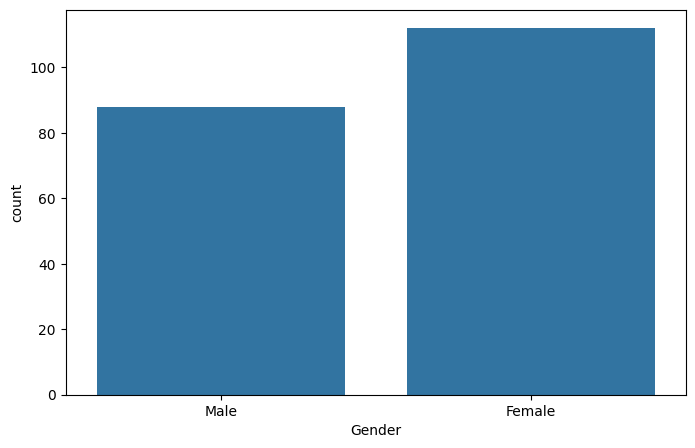

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=dataset)
plt.show()

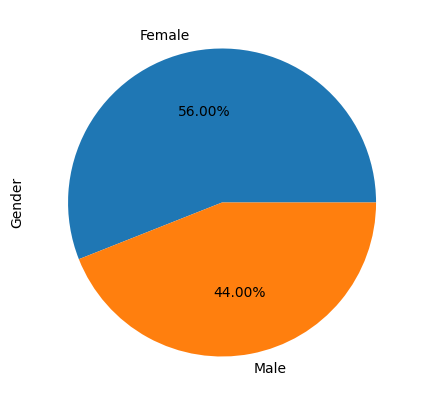

In [ ]:
plt.figure(figsize=(8, 5))
dataset.Gender.value_counts().plot.pie(autopct='%.2f%%')
plt.show()

<Axes: ylabel='Frequency'>

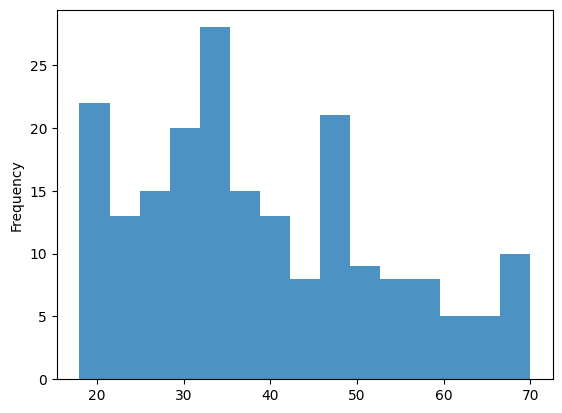

In [ ]:
dataset.Age.plot.hist(bins=15, alpha=.8)

<Axes: ylabel='Frequency'>

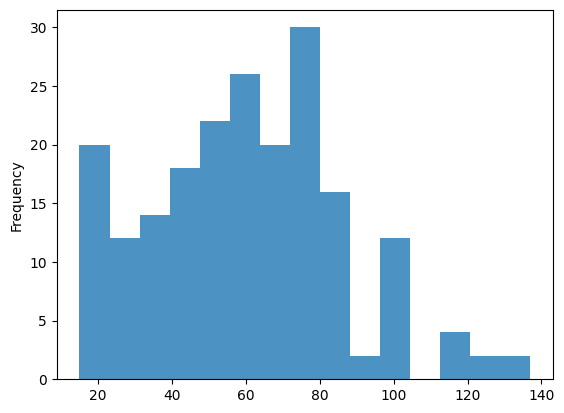

In [ ]:
dataset['Annual Income (k$)'].plot.hist(bins=15, alpha=.8)


<Axes: ylabel='Frequency'>

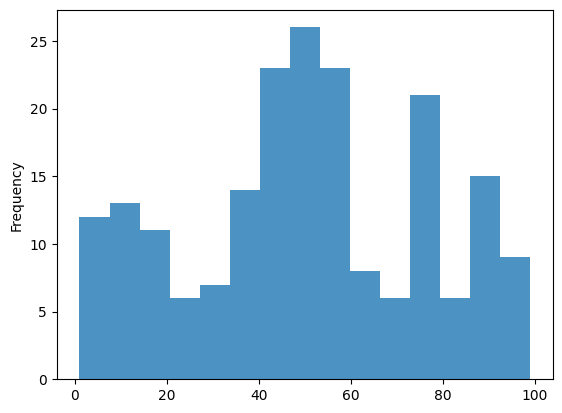

In [ ]:
dataset['Spending Score (1-100)'].plot.hist(bins=15, alpha=.8)


In [ ]:
dataset['Gender'] = dataset.Gender.map({'Male':1,'Female':0})

In [ ]:
# PCA - Principal Component Analysis

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
X = dataset.iloc[:,1:]

# Perform PCA with 2 components
reduced = PCA(n_components=2).fit_transform(X)


In [ ]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(init='k-means++', n_clusters=6, random_state=10)
kmeans.fit(reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=10)

In [ ]:
pca_df = pd.DataFrame(reduced,columns=['Component1','Component2'])
pca_df['Segment'] = kmeans.labels_
pca_df.head(10)

,Component1,Component2,Segment
0,-31.869945,-33.001252,1
1,0.764494,-56.842901,3
2,-57.408276,-13.124961,1
3,-2.168543,-53.478590,3
4,-32.174085,-30.388412,1
5,-2.176952,-52.227269,3
6,-59.065690,-9.543763,1
7,12.370862,-61.618021,3
8,-66.315769,-3.214232,1
9,-5.655562,-47.267222,3


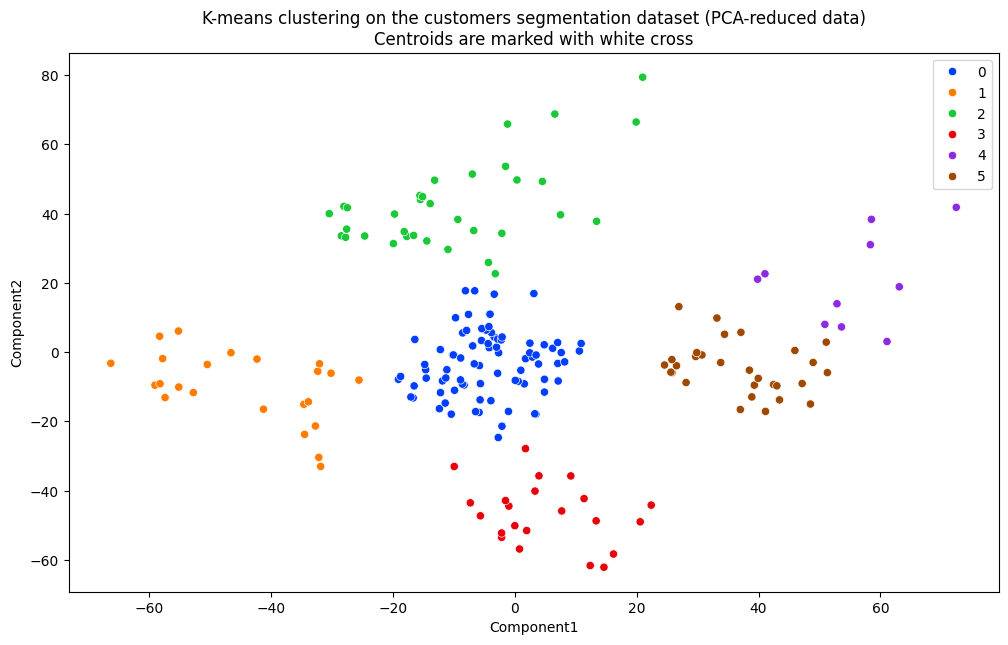

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Component1',y='Component2',data=pca_df,hue='Segment',palette='bright')
plt.title('K-means clustering on the customers segmentation dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.legend()
plt.show()